# Pymaceuticals Inc.
---

### Analysis

Capomulin has over 200 days of tumor treatment observaions. Other drugs have about the same number of observations which makes this study well balanced. The mouse pobulation has 51% males and 49% feamils for this study group. For fair comparison of tumor treatments only the mice with Timepoint = 45 should be used for further analysis. The mice wiht Timepoint < 45 didn't completed full treatment and will not be considered in this study. Boxplot shows that Capomulin and Ramicane have about the same low average tumor volume after 45 days of treatment. While Infubinol and Ceftamin have high average tumor volume after 45 days of treatment wich proves them less effctive for treatment. Capomulin treatmet of mouse l509 shows that after 15 days of treatment the tumor volume steadily decreases. The study also found the mice with high weigh have hiegher tumor volumes; the dose of Capomulin might needs to increased for mice with higer weight. Overall Capolin demonstrains to be effective in tumor treatment compare to other drugs. Further studies needed to be conducted to adjust the daily dose of Capomulin base on mice weight. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display both data tables for preview
display(mouse_metadata.shape)
display(mouse_metadata.head())
display(study_results.shape)
display(study_results.head())

(249, 5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


(1893, 4)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
display(mouse_study.shape)
mouse_study.head()

(1893, 8)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_study['Mouse ID'].unique().size

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate = mouse_study[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]
display(duplicate)
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate['Mouse ID'].unique()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = mouse_study.loc[mouse_study['Mouse ID'] != 'g989']
display(df_clean.shape)
df_clean.head()

(1880, 8)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
df_clean['Mouse ID'].unique().size

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame

df_stats_mean = df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
df_stats_median = df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
df_stats_variance = df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
df_stats_std = df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
df_stats_sem = df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
# The sem() method calculates the standard error of the mean for each column

df_stats = pd.DataFrame({"Mean Tumor Volume": df_stats_mean,
                        "Median Tumor Volume": df_stats_median, 
                        "Tumor Volume Variance": df_stats_variance,
                        "Tumor Volume Std. Dev.": df_stats_std,
                        "Tumor Volume Std. Err.": df_stats_sem })


display(df_stats)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df_clean.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

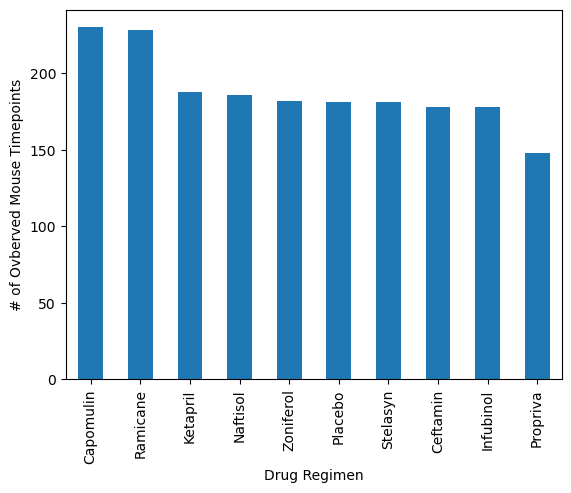

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Count the total number of rows (Mouse ID/Timepoints) for each drug regimen
count_drugs = df_clean.groupby(['Drug Regimen'])['Drug Regimen'].count().sort_values(ascending=False)

# Create a bar chart based off of the group series from before
count_chart = count_drugs.plot(kind='bar')  #, figsize=(6,8))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("# of Ovberved Mouse Timepoints")

plt.show()
#plt.tight_layout()

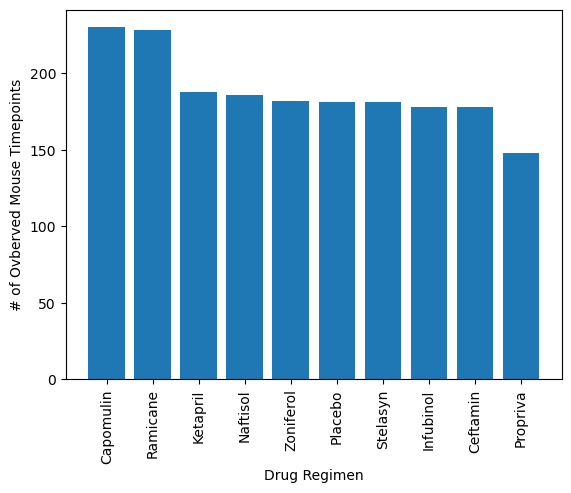

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Count the total number of rows (Mouse ID/Timepoints) for each drug regimen
count_drugs_df = df_clean.copy()
count_drugs_df['Drug Regimen Count'] = count_drugs_df.groupby(['Drug Regimen'])['Drug Regimen'].transform(lambda x: x.count())
count_drugs_df = count_drugs_df[['Drug Regimen', 'Drug Regimen Count' ]].drop_duplicates(subset=['Drug Regimen', 'Drug Regimen Count'], keep='first')
count_drugs_df = count_drugs_df.sort_values(by=['Drug Regimen Count'], ascending=False)
count_drugs_df = count_drugs_df.reset_index(drop=True)

# Set x axis, y axis and tick locations
x_axis = np.arange(len(count_drugs_df['Drug Regimen']))
y_axis = count_drugs_df['Drug Regimen Count']
tick_locations = [value for value in x_axis]

# Tell matplotlib that we will be making a bar chart
# We apply align="center" to ensure our bars line up with our tick marks
plt.bar(x_axis, y_axis, align="center")
plt.xticks(tick_locations, count_drugs_df['Drug Regimen'], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Ovberved Mouse Timepoints")
plt.show()

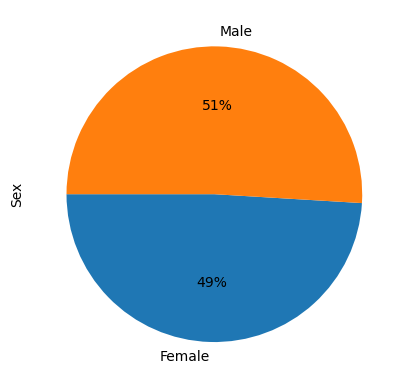

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = df_clean.groupby(['Sex'])['Sex'].count()

# Create a pie chart based off of the group series from before
mice_sex_chart = mice_sex.plot(kind='pie', autopct='%1.0f%%', startangle=180)
plt.show()

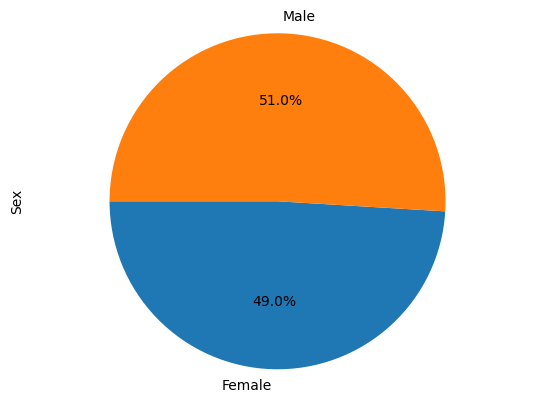

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_df = pd.DataFrame({"Sex_count": mice_sex})

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(mice_sex_df["Sex_count"], labels=["Female", "Male"], autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show() 



In [14]:
display(df_clean.columns)
df_clean.head()

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df_clean['Last_timepoint'] = df_clean.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].transform(lambda x: x.max())
display(df_clean.shape)
display(df_clean.head())
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
filter_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
df_treatment =  df_clean.loc[((df_clean['Drug Regimen']).isin(filter_list)) & (df_clean['Timepoint'] == df_clean['Last_timepoint'])]
display(df_treatment.shape)
# Explor Last timepoint values 
df_sorted = df_treatment.sort_values(by = ['Timepoint'], ascending=False)
df_sorted[50:100]


(1880, 9)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


(100, 9)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last_timepoint
184,i177,Ramicane,Male,10,18,45,33.562402,3,45
134,r554,Capomulin,Female,8,17,45,32.377357,3,45
1872,z581,Infubinol,Female,24,25,45,62.754451,3,45
309,b128,Capomulin,Female,9,22,45,38.982878,2,45
299,b742,Capomulin,Male,7,21,45,38.939633,0,45
214,a520,Ramicane,Male,13,21,45,38.810366,1,45
282,l897,Capomulin,Male,17,19,45,38.846876,1,45
224,w914,Capomulin,Male,24,21,45,36.041047,2,45
272,d251,Ramicane,Female,8,19,45,37.311236,2,45
204,i738,Capomulin,Female,23,20,45,37.311846,2,45


**Note:** For fair comparison of tumor treatments only the mice with Timepoint = 45 should be used for further analysis. 
    The mice wiht Timepoint < 45 didn't completed full treatment and will not be considered in this study. 

In [16]:
# Create clean treatment df based on the Note above
df_treatment_clean =  df_treatment.loc[(df_treatment['Last_timepoint'] == 45)]
display(df_treatment_clean.shape)

(63, 9)

In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
filter_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
df_Capomulin =  df_treatment_clean.loc[(df_treatment_clean['Drug Regimen'] == 'Capomulin'), ['Tumor Volume (mm3)']]
df_Ramicane =  df_treatment_clean.loc[(df_treatment_clean['Drug Regimen'] == 'Ramicane'), ['Tumor Volume (mm3)']]
df_Infubinol =  df_treatment_clean.loc[(df_treatment_clean['Drug Regimen'] == 'Infubinol'), ['Tumor Volume (mm3)']]
df_Ceftamin =  df_treatment_clean.loc[(df_treatment_clean['Drug Regimen'] == 'Ceftamin'), ['Tumor Volume (mm3)']]

#Check if the number of rows correct for each treatment 
display(df_Capomulin.shape)
display(df_Ramicane.shape)
display(df_Infubinol.shape)
display(df_Ceftamin.shape)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = df_treatment_clean['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#Find outliers per treatment
Capomulin_outlier = df_Capomulin.loc[(df_Capomulin['Tumor Volume (mm3)'] > upper_bound) | (df_Capomulin['Tumor Volume (mm3)'] < lower_bound)]
Ramicane_outlier = df_Ramicane.loc[(df_Ramicane['Tumor Volume (mm3)'] > upper_bound) | (df_Ramicane['Tumor Volume (mm3)'] < lower_bound)]
Infubinol_outlier = df_Infubinol.loc[(df_Infubinol['Tumor Volume (mm3)'] > upper_bound) | (df_Infubinol['Tumor Volume (mm3)'] < lower_bound)]
Ceftamin_outlier = df_Ceftamin.loc[(df_Ceftamin['Tumor Volume (mm3)'] > upper_bound) | (df_Ceftamin['Tumor Volume (mm3)'] < lower_bound)]

print(f"Capomulin's potetial outlers: {Capomulin_outlier}")
print(f"Ramicane's potetial outlers: {Ramicane_outlier}")
print(f"Capomulin's potetial outlers: {Infubinol_outlier}")
print(f"Capomulin's potetial outlers: {Ceftamin_outlier}")

(21, 1)

(20, 1)

(9, 1)

(13, 1)

Capomulin's potetial outlers: Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Ramicane's potetial outlers: Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Capomulin's potetial outlers: Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Capomulin's potetial outlers: Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []


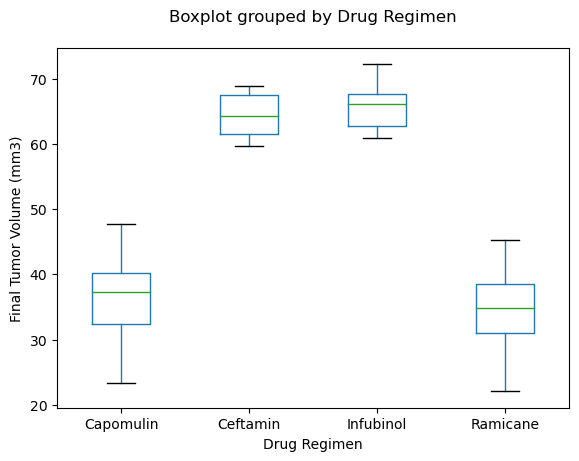

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
filter_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment =  df_treatment_clean.loc[((df_treatment_clean['Drug Regimen']).isin(filter_list)), ['Drug Regimen', 'Tumor Volume (mm3)']]

# Generate a box plot
treatment.boxplot(by = 'Drug Regimen', column = ['Tumor Volume (mm3)'], grid = False) 
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('')
plt.show()

## Line and Scatter Plots

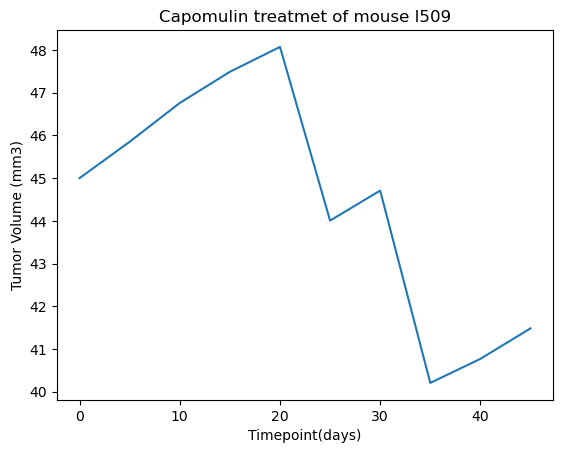

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 =  df_clean.loc[(df_clean['Drug Regimen'] == 'Capomulin') & (df_clean['Mouse ID'] == 'l509')]
# Create a line plot
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'])
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin treatmet of mouse l509')
# Show the graph that we have created
plt.show()

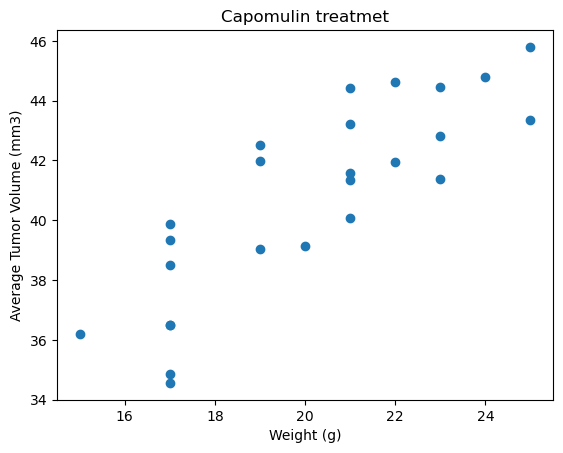

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df_Capomulin = df_clean.loc[(df_clean['Drug Regimen'] == 'Capomulin')]
df_Capomulin['Avg Tumor Volume (mm3)'] = df_clean.groupby(['Mouse ID'])['Tumor Volume (mm3)'].transform(lambda x: x.mean())
df_Capomulin_avg_tumor = df_Capomulin.drop_duplicates(subset=['Mouse ID'], keep='first')
plt.scatter(df_Capomulin_avg_tumor['Weight (g)'], df_Capomulin_avg_tumor['Avg Tumor Volume (mm3)'], marker="o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Capomulin treatmet')
plt.show()
            

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


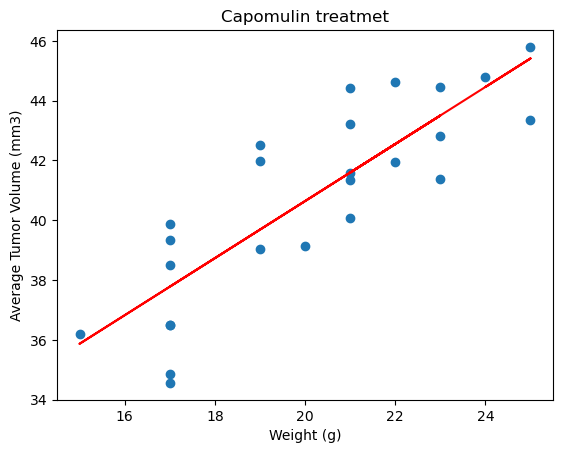

Linear regression equetion is y = 0.95x + 21.55


In [21]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(df_Capomulin_avg_tumor['Weight (g)'], df_Capomulin_avg_tumor['Avg Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Create a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = df_Capomulin_avg_tumor['Weight (g)']
y_values = df_Capomulin_avg_tumor['Avg Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Capomulin treatmet')
plt.show()
print(f'Linear regression equetion is {line_eq}')